# <a id="id1"><center>Module 5 - Modern Portfolio Theory</center></a>

## <a id="id1" style="color:#FF0000;">Modern Portfolio Theory<a/>
In this module, We’ll be looking at investment portfolio optimization with python, the fundamental concept of diversification and the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based on investment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

[Modern Portfolio Theory](https://www.investopedia.com/terms/m/modernportfoliotheory.asp) suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk. It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio. MPT quantifies the benefits of diversification, also known as not putting all of your eggs in one basket.

## <a id="id1">Problem Statement 5.1</a>
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [52]:
stock_data = pd.read_csv('./week2.csv', index_col = 0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.set_index('Date', inplace = True)
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96,2017,5,772.800000,0.000000,Slight or No change
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77,2017,5,781.803741,1.578675,Positive
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34,2017,5,782.447781,-0.171975,Slight or No change
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83,2017,5,776.867021,-4.683213,Among top losers
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52,2017,5,765.239492,-3.192985,Among top losers


**We already have the Daily Returns(`Day_Perc_Change`) Column in `stock_data` Dataframe.** <br>
**But it is in Percentage format**

In [53]:
stock_data.Day_Perc_Change = stock_data['Close Price'].pct_change(fill_method='ffill').fillna(0)
stock_data.Day_Perc_Change.head()

Date
2017-05-15    0.000000
2017-05-16    0.015787
2017-05-17   -0.001720
2017-05-18   -0.046832
2017-05-19   -0.031930
Name: Day_Perc_Change, dtype: float64

In [54]:
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96,2017,5,772.800000,0.000000,Slight or No change
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77,2017,5,781.803741,0.015787,Positive
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34,2017,5,782.447781,-0.001720,Slight or No change
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83,2017,5,776.867021,-0.046832,Among top losers
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52,2017,5,765.239492,-0.031930,Among top losers


#### Mean Daily Return
Avoiding first record. Because it's NaN value

In [55]:
daily_mean = stock_data[1:].Day_Perc_Change.mean()
round(daily_mean, 9)

0.000277859

#### Daily Standard Deviation of Returns

In [56]:
daily_std = stock_data[1:].Day_Perc_Change.std()
round(daily_std, 8)

0.02291942

#### Annual Mean

In [57]:
annual_mean = daily_mean*252
round(annual_mean, 4)

0.07

#### Annual Standard Deviation

In [58]:
annual_std = daily_std*pd.np.sqrt(252)
round(annual_std, 9)

0.363834487

## <a id="id2">Problem Statement 5.2</a>
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance ) 

Importing 5 different Stocks

In [59]:
asianpaint_stock = pd.read_csv("./ASIANPAINT.csv")
bajfinance_stock = pd.read_csv("./BAJFINANCE.csv")
hdfc_stock = pd.read_csv("./HDFCBANK.csv")
hindunilvr_stock = pd.read_csv("./HINDUNILVR.csv")
titan_stock = pd.read_csv("./TITAN.csv")

Deleting Duplicate values in the 5 stocks

In [60]:
asianpaint_stock = asianpaint_stock[asianpaint_stock.Series == 'EQ'].reset_index(drop=True)
bajfinance_stock = bajfinance_stock[bajfinance_stock.Series == 'EQ'].reset_index(drop=True)
hdfc_stock = hdfc_stock[hdfc_stock.Series == 'EQ'].reset_index(drop=True)
hindunilvr_stock = hindunilvr_stock[hindunilvr_stock.Series == 'EQ'].reset_index(drop=True)
titan_stock = titan_stock[titan_stock.Series == 'EQ'].reset_index(drop=True)

Seeing the rows and Coloumns of each stock after deleting duplications

In [61]:
asianpaint_stock.shape

(494, 15)

In [62]:
bajfinance_stock.shape

(494, 15)

In [63]:
hdfc_stock.shape

(494, 15)

In [64]:
hindunilvr_stock.shape

(494, 15)

Inserting the Close Price of Each Stock into the one Dataframe

In [66]:
close_price_stock = pd.DataFrame({asianpaint_stock.Symbol[0] : asianpaint_stock["Close Price"],
                                  bajfinance_stock.Symbol[0] : bajfinance_stock["Close Price"],
                                  hdfc_stock.Symbol[0] : hdfc_stock["Close Price"],
                                  hindunilvr_stock.Symbol[0] : hindunilvr_stock["Close Price"],
                                  titan_stock.Symbol[0] : titan_stock["Close Price"]})

In [67]:
close_price_stock.head()

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
0,1148.05,1332.95,1553.40,983.25,483.65
1,1142.85,1347.75,1559.65,1000.40,488.30
2,1154.95,1324.80,1557.15,1009.40,481.75
3,1151.35,1314.55,1557.10,990.25,471.65
4,1123.15,1289.15,1561.25,1008.00,471.15


In [68]:
close_price_stock.tail()

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
489,1387.80,3017.05,2322.35,1697.50,1086.50
490,1385.70,2921.30,2307.25,1688.70,1088.70
491,1354.20,2971.35,2290.90,1703.75,1104.45
492,1341.05,2922.85,2296.50,1687.45,1132.10
493,1332.50,2931.85,2287.20,1702.00,1144.70


In [69]:
close_price_stock.shape

(494, 5)

#### Daily Returns

In [70]:
daily_returns = close_price_stock.pct_change(fill_method='ffill').dropna()
daily_returns.head()

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
1,-0.004529,0.011103,0.004023,0.017442,0.009614
2,0.010588,-0.017028,-0.001603,0.008996,-0.013414
3,-0.003117,-0.007737,-0.000032,-0.018972,-0.020965
4,-0.024493,-0.019322,0.002665,0.017925,-0.001060
5,-0.009438,-0.036458,0.009448,0.010516,0.021755


#### Mean Daily Returns

In [71]:
daily_mean_returns = daily_returns.mean()
daily_mean_returns

ASIANPAINT    0.000389
BAJFINANCE    0.001803
HDFCBANK      0.000830
HINDUNILVR    0.001188
TITAN         0.001951
dtype: float64

#### 20% Weightage for each Stock

In [72]:
weights = pd.np.array([0.2]*5)
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

#### Annual Mean Returns for Portfolio

In [73]:
annual_returns = (daily_mean_returns * weights).sum() * 252
round(annual_returns,4)

0.3105

#### Covariance Matrix

In [74]:
 daily_returns.BAJFINANCE.mean()

0.0018029055588609634

In [75]:
covariance = daily_returns.cov()
covariance

,ASIANPAINT,BAJFINANCE,HDFCBANK,HINDUNILVR,TITAN
ASIANPAINT,0.000174,0.000068,0.000036,0.000048,0.000057
BAJFINANCE,0.000068,0.000409,0.000055,0.000047,0.000063
HDFCBANK,0.000036,0.000055,0.000090,0.000028,0.000031
HINDUNILVR,0.000048,0.000047,0.000028,0.000149,0.000056
TITAN,0.000057,0.000063,0.000031,0.000056,0.000419


#### Annual Standard Deviation (Volatility)

### Procedure To Calculate Annual Standard Deviation
- Volatility for entire portfolio can meansure by [Portfolio Standard Deviation](http://financialmanagementpro.com/standard-deviation-of-portfolio/) formula.
- It depends on Three Factors
    1. Weightage of each asset/stock
    2. Standard deviation of each asset
    3. Covariance between pair of assets
    
#### Formula
$$σ_{p} = \sqrt{\sum_{i=1}^{N}W_{i}^2\cdotσ^2(k_{i}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}W_{i}\cdot{W_{j}}\cdot{Cov(k_{i},k_{j})}}$$

 - **$σ_{p}$** = Portfolio Standard Deviation
 - **N** = number of assets in a portfolio, 
 - **$W_{i}$** = Weight/proportion of ith asset in a portfolio, 
 - **$W_{j}$** = proportion of jth asset in a portfolio, 
 - **$σ^2(k_{i})$** =  variance of return of ith asset
 - **$Cov(k_{i},k_{j})$** = covariance of returns of ith asset and jth asset.
 
 
 **Variance of one asset is covariance between same asset.so formula become,**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}W_{i}\cdot{W_{i}}\cdot{Cov(k_{i}, k_{i}}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}W_{i}\cdot{W_{j}}\cdot{Cov(k_{i},k_{j})}}$$
 <br>**Now, Our weights for all assets are same. 0.2....... Therefore**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i}, k_{i}}){+}\sum_{i=1}^{N}\sum_{j\neq i}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i},k_{j})}}$$
 <br>**So both parts are same, Now**<br><br>
 $$σ_{p} = \sqrt{\sum_{i=1}^{N}\sum_{j=i}^{N}0.2\cdot{0.2}\cdot{Cov(k_{i},k_{j})}}$$

In [76]:
annual_std = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
round(annual_std, 4)

0.1495

## <a id="id3">Problem Statement 5.3</a>
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

To get the same random numbers every time for reproducibility.

In [77]:
pd.np.random.seed(42)

Number of Different Portfolios considered

In [78]:
portfolio_num = 8000

To save all weightage of all portfolios

In [79]:
all_weights = pd.np.zeros((portfolio_num, len(covariance)))

In [80]:
all_weights[5]

array([0., 0., 0., 0., 0.])

In [81]:
a = len(all_weights)

In [82]:
a

8000

Array for storing Returns, Volatility and Sharpe Ratio for specific Portfolio

In [83]:
ret_vol_sharpe = pd.np.zeros((portfolio_num, 3))

In [84]:
portfolio_num

8000

#### Calculate The Returns, Volatility and Sharpe Ratio for Different Possible Portfolio

In [85]:
for i in range(portfolio_num):
    # Random Weights for 5 different assets in portfolio
    weights = pd.np.random.random(5)
    weights /= weights.sum()
    # Save weights
    all_weights[i,:] = weights
    # calculate Portfolio Returns
    ret_vol_sharpe[i,0] = (daily_mean_returns * weights).sum() * 252
    # calculate Portfolio Volatility
    ret_vol_sharpe[i,1] = pd.np.sqrt(pd.np.dot(weights,pd.np.dot(weights, covariance))) * pd.np.sqrt(252)
    # calculate Sharpe Ratio
    ret_vol_sharpe[i,2] = ret_vol_sharpe[i,0] / ret_vol_sharpe[i,1]

In [86]:
ret_vol_sharpe = pd.DataFrame(ret_vol_sharpe, columns=['Returns', 'Volatility', 'Sharpe_Ratio'])

In [87]:
ret_vol_sharpe.head()

,Returns,Volatility,Sharpe_Ratio
0,0.312104,0.158954,1.963490
1,0.314225,0.148354,2.118079
2,0.347157,0.179209,1.937167
3,0.310213,0.140916,2.201403
4,0.277769,0.151184,1.837297


In [88]:
ret_vol_sharpe.tail()

,Returns,Volatility,Sharpe_Ratio
7995,0.286249,0.137626,2.079904
7996,0.185463,0.140577,1.319299
7997,0.304831,0.162048,1.881111
7998,0.367710,0.169892,2.164371
7999,0.312649,0.163326,1.914261


#### Scatter Plot

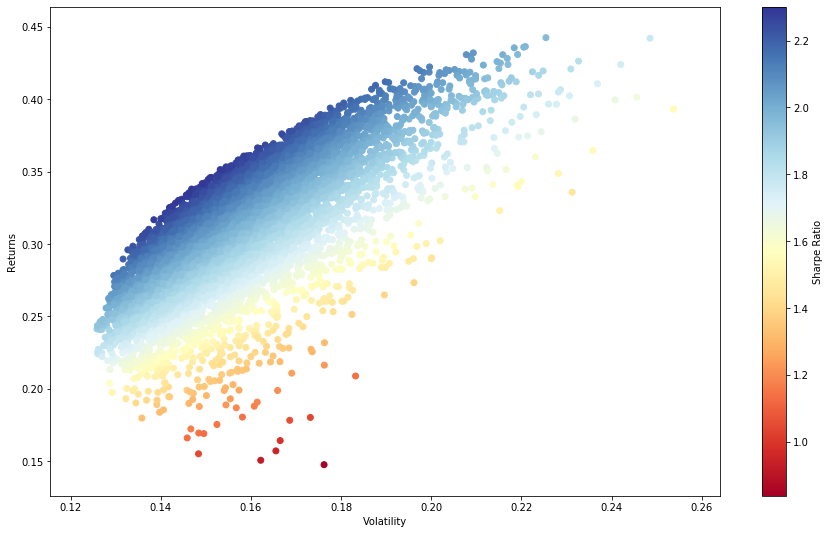

In [89]:
plt.figure(figsize=(15,9))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## <a id="id4">Problem Statement 5.4</a>
Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest. 

<img src="https://www.aspiration.link/machine-learning/internship/images/15.png" alt="Drawing" style="width: 700px;" align="left"/>

Seeing all Weights for confirmation

In [90]:
all_weights

array([[0.13319703, 0.33810082, 0.26031769, 0.21289984, 0.05548463],
       [0.06528492, 0.02430844, 0.36250145, 0.25157131, 0.29633388],
       [0.00928442, 0.43746759, 0.37546445, 0.09577331, 0.08201023],
       ...,
       [0.25062383, 0.02401306, 0.09845255, 0.3090668 , 0.31784376],
       [0.06071122, 0.21098163, 0.2103222 , 0.17016168, 0.34782327],
       [0.27825426, 0.2821264 , 0.09947675, 0.16027307, 0.17986952]])

#### Portfolio 1 - The Sharpe ratio is the highest
Calculating the Returns for which having an maximum Sharpe Ratio

In [91]:
high_sharpe_ratio_returns = ret_vol_sharpe.Returns[ret_vol_sharpe.Sharpe_Ratio.idxmax()]

In [92]:
high_sharpe_ratio_returns

0.33797986804336855

Calculating the Volatility for which having maximum Sharpe Ratio

In [93]:
high_sharpe_ratio_volatility = ret_vol_sharpe.Volatility[ret_vol_sharpe.Sharpe_Ratio.idxmax()]

In [94]:
high_sharpe_ratio_volatility

0.1468312467324686

Max Sharpe Ratio

In [95]:
ret_vol_sharpe.Sharpe_Ratio.max()

2.301825228380571

It's Location

In [97]:
ret_vol_sharpe.Sharpe_Ratio.idxmax()

831

Weights for Best Portfolio

In [99]:
all_weights[ret_vol_sharpe.Sharpe_Ratio.idxmax(),:]

array([0.00440529, 0.18454587, 0.29072094, 0.3270908 , 0.19323711])

In [100]:
all_weights[831]

array([0.00440529, 0.18454587, 0.29072094, 0.3270908 , 0.19323711])

Low Volatility

In [101]:
low_volatility = ret_vol_sharpe.Volatility.min()

In [102]:
low_volatility

0.12583883177418315

Calculating Returns for which having an minmum volatility

In [103]:
low_volatility_idx = ret_vol_sharpe.Volatility.idxmin()
low_volatility_returns = ret_vol_sharpe.Returns[low_volatility_idx]

In [104]:
low_volatility_returns

0.24133010156598148

It's Located

In [105]:
low_volatility_idx

6583

Weights for Low Volatility

In [106]:
all_weights[low_volatility_idx,:]

array([0.16604141, 0.04267851, 0.48017087, 0.24798249, 0.06312672])

Pointing the High Sharpe Ratio with Red Star and Low Volatility with Green Star

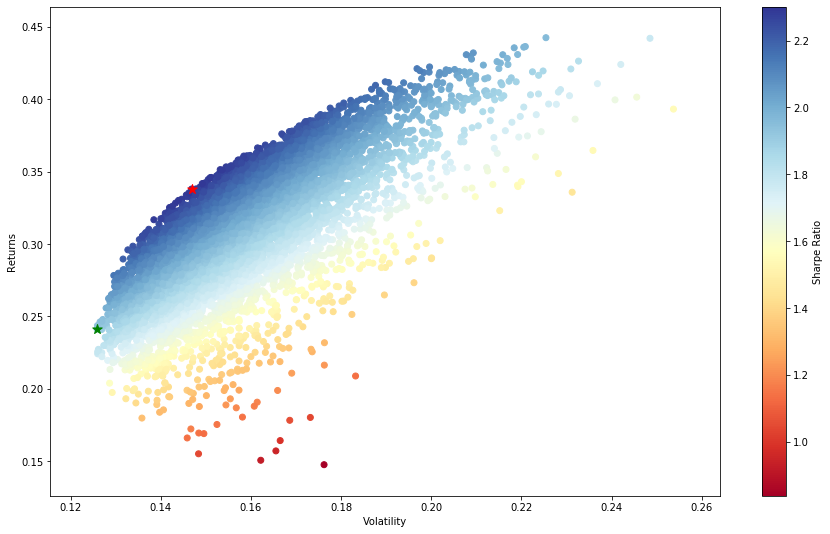

In [107]:
plt.figure(figsize=(15,9))
plt.scatter(ret_vol_sharpe.Volatility, ret_vol_sharpe.Returns, c=ret_vol_sharpe.Sharpe_Ratio, cmap='RdYlBu')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Returns')
# Best Portfolio
plt.scatter(high_sharpe_ratio_volatility, high_sharpe_ratio_returns, c='r', s=100, marker='*')
# Low Volatility : Low risk
plt.scatter(low_volatility, low_volatility_returns, c='g', s=100, marker='*')
plt.show()

### CAPM Model use for Systematic risk
### While MPT theory used for both Systematic and Unsystematic Risk